In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

In [2]:
print(os.getcwd())

/Users/rao/Desktop/Football_Data


In [3]:
df = pd.read_csv(r'/Users/rao/Desktop/Football_Data/laliga_stats_passing.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = df.drop('Rk', axis = 1)
df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Total_Cmp',
       'Total_Att', 'Total_Cmp%', 'TotDist', 'Total_PrgDist', 'Short_Cmp',
       'Short_Att', 'Short_Cmp%', 'Med_Cmp', 'Med_Att', 'Med_Cmp%', 'Long_Cmp',
       'Long_Att', 'Long_Cmp%', 'Ast', 'xA', 'A-xA', 'KP', '1/3rd', 'PPA',
       'CrsPA', 'Prog'],
      dtype='object')

In [4]:
df['Pos'].unique()

array(['DF', 'FWMF', 'DFMF', 'MF', 'FW', 'MFFW', 'GK', 'MFDF', 'DFFW',
       'GKMF'], dtype=object)

In [5]:
df_total = df[['Player', 'Pos', 'Squad', '90s', 'Total_Cmp',
       'Total_Att', 'Total_Cmp%', 'TotDist', 'Total_PrgDist']]

df_total['per90'] = df_total['Total_PrgDist']/df_total['90s'] #Prog passes per 90 min
#df_total

/Users/rao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
df_total['Squad'].unique()

array(['Sevilla', 'Cádiz', 'Alavés', 'Celta Vigo', 'Betis', 'Elche',
       'Barcelona', 'Villarreal', 'Valladolid', 'Getafe', 'Eibar',
       'Athletic Club', 'Real Sociedad', 'Real Madrid', 'Granada',
       'Levante', 'Osasuna', 'Valencia', 'Huesca', 'Atlético Madrid'],
      dtype=object)

In [7]:
df_total[df_total['Squad'] == 'Barcelona' ]
df_total = df_total.sort_values(by='per90',ascending=False)

df_total = df_total[df_total['Pos'] != 'GK']

In [8]:
df_total = df_total[df_total['90s']>= 7]

Text(0.5, 1.0, 'Progressive Passes')

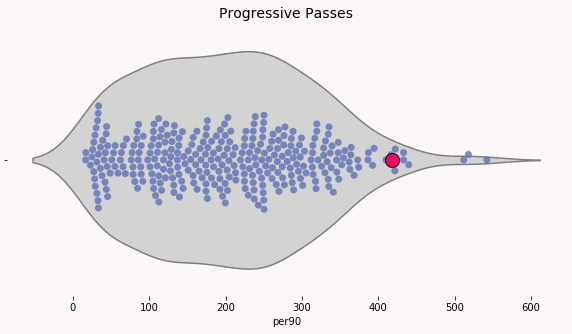

In [9]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)


ax = sns.violinplot(x="per90", data=df_total, color = 'lightgrey', inner=None)
sns.swarmplot(x = 'per90' , color = '#6070b5', data = df_total, zorder = 1, marker = 'o', alpha = 0.8, s = 7)

plt.scatter(x=417.474227, y=0, c='#ec0054', edgecolor='black', s=200,zorder=2, alpha = 0.9)

plt.title('Progressive Passes',c='black',fontsize=14)
#plt.savefig('Progressive Passes.png', dpi=600, bbox_inches='tight')

In [10]:
df_total = df_total.sort_values(by='Total_Cmp%',ascending=False)
df_total

,Player,Pos,Squad,90s,Total_Cmp,Total_Att,Total_Cmp%,TotDist,Total_PrgDist,per90
201,Nemanja Gudelj\Nemanja-Gudelj,MFDF,Sevilla,9.1,591.0,626.0,94.4,11907.0,2402.0,263.956044
190,Sergi Gómez\Sergi-Gomez,DF,Sevilla,8.0,506.0,540.0,93.7,11057.0,2517.0,314.625000
416,Gerard Piqué\Gerard-Pique,DF,Barcelona,10.3,745.0,798.0,93.4,15532.0,3981.0,386.504854
277,Clément Lenglet\Clement-Lenglet,DF,Barcelona,20.1,1515.0,1634.0,92.7,29298.0,10292.0,512.039801
438,Sergio Ramos\Sergio-Ramos,DF,Real Madrid,14.2,1023.0,1114.0,91.8,23732.0,7702.0,542.394366
301,Aïssa Mandi\Aissa-Mandi,DF,Betis,20.6,1087.0,1184.0,91.8,24957.0,7975.0,387.135922
235,Frenkie de Jong\Frenkie-de-Jong,MFDF,Barcelona,26.2,1981.0,2157.0,91.8,33882.0,9508.0,362.900763
24,Ronald Araújo\Ronald-Araujo,DF,Barcelona,11.1,621.0,678.0,91.6,12605.0,2763.0,248.918919
68,Sergio Busquets\Sergio-Busquets,MF,Barcelona,19.4,1742.0,1909.0,91.3,30985.0,8099.0,417.474227
337,Óscar Mingueza\Oscar-Mingueza,DF,Barcelona,15.6,1052.0,1154.0,91.2,17359.0,5124.0,328.461538


In [11]:
df_total['Total_Cmp'] = df_total['Total_Cmp']/df_total['90s']
df_total['Total_Att'] = df_total['Total_Att']/df_total['90s']

df_total['Total_Cmp%'] = (df_total['Total_Cmp']/df_total['Total_Att']) * 100
#df_total

Text(0.5, 1.0, 'Pass Completion %')

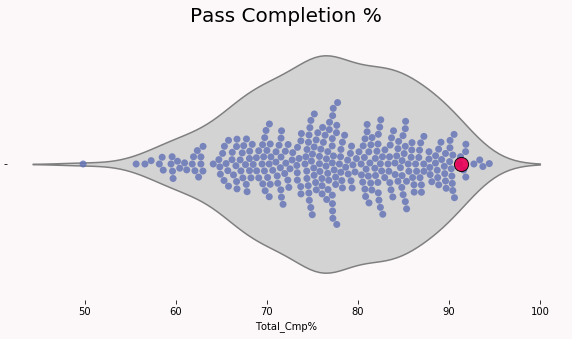

In [12]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)


ax = sns.violinplot(x="Total_Cmp%", data=df_total, color = 'lightgrey', inner=None) 
sns.swarmplot(x = 'Total_Cmp%' , color = '#6070b5', data = df_total, zorder = 1, marker = 'o', alpha = 0.8, s = 7)

plt.scatter(x=91.251964, y=0, c='#ec0054', edgecolor='black', s=200,zorder=2, alpha = 0.9)

plt.title('Pass Completion %',c='black',fontsize=20)
#plt.savefig('Sucessful passes.png', dpi=600, bbox_inches='tight')

In [13]:
df2 = pd.read_csv(r'/Users/rao/Desktop/Football_Data/Book2.csv')
#df2

In [14]:
df2['Pos'].unique()

array(['MF', 'MFDF', 'MFFW', 'FW', 'DF', 'FWMF', 'DFFW', 'DFMF', 'GK',
       'GKMF'], dtype=object)

In [15]:
df2 = df2[df2['Pos'] != 'GK']
#df2

In [16]:
df2.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Tkl',
       'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past',
       'Press▼', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks',
       'Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches'],
      dtype='object')

In [17]:
df2 = df2.sort_values(by='Press▼',ascending=False)
df2 = df2[df2['90s'] >= 7]
df2

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press▼,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
110,111,Manu Vallejo\Manu-Vallejo,es ESP,FW,Valencia,24-041,1997,9.1,1.98,0.88,0.55,0.99,0.44,0.55,1.87,29.4,1.32,25.40,5.38,21.2,4.62,12.00,8.79,1.10,0.11,0.00,0.99,0.55,2.53,0.22,0.00,Matches
64,65,Kike Pérez\Kike-Perez,es ESP,MF,Valladolid,24-041,1997,11.5,2.70,1.48,0.78,1.48,0.43,0.96,2.78,34.4,1.83,24.50,6.61,27.0,6.61,13.00,4.87,1.74,0.17,0.00,1.57,0.87,3.57,1.30,0.00,Matches
24,25,Jaime Seoane\Jaime-Seoane,es ESP,MF,Huesca,24-064,1997,15.7,2.93,1.97,1.34,1.34,0.25,1.15,3.06,37.5,1.91,23.90,6.43,26.9,8.66,11.90,3.38,1.59,0.45,0.00,1.15,0.76,3.69,1.08,0.00,Matches
154,155,Toni Villa\Toni-Villa,es ESP,MFFW,Valladolid,26-079,1995,8.1,2.72,1.98,0.86,1.23,0.62,0.99,3.33,29.6,2.35,23.30,8.15,34.9,4.81,11.40,7.16,0.99,0.00,0.00,0.99,0.37,3.09,0.25,0.00,Matches
120,121,Fran Beltrán\Fran-Beltran,es ESP,MF,Celta Vigo,22-052,1999,9.6,1.88,1.04,0.94,0.63,0.31,0.42,1.77,23.5,1.35,22.90,7.92,34.5,7.29,11.70,3.96,1.35,0.00,0.00,1.35,0.73,2.60,1.15,0.00,Matches
76,77,Ante Budimir\Ante-Budimir,hr CRO,FW,Osasuna,29-248,1991,11.7,1.28,0.94,0.26,0.60,0.43,0.17,0.60,28.6,0.43,22.70,6.84,30.1,1.97,9.15,11.60,0.94,0.09,0.00,0.85,0.09,1.37,0.94,0.00,Matches
4,5,Jon Moncayola\Jon-Moncayola,es ESP,MF,Osasuna,22-318,1998,22.5,1.87,0.93,0.80,0.80,0.27,0.80,2.31,34.6,1.51,22.50,5.73,25.5,7.20,11.50,3.78,1.51,0.27,0.00,1.24,0.67,2.53,1.64,0.04,Matches
95,96,Lee Kangin\Lee-Kangin,kr KOR,FWMF,Valencia,20-036,2001,11.1,1.17,0.99,0.45,0.45,0.27,0.36,2.43,14.8,2.07,22.30,5.59,25.1,3.42,11.90,6.94,0.72,0.00,0.00,0.72,0.09,1.26,0.09,0.00,Matches
8,9,Pedri\Pedri,es ESP,MF,Barcelona,18-122,2002,20.2,1.68,1.24,0.54,0.69,0.45,0.74,2.18,34.1,1.44,22.20,6.53,29.5,5.35,9.85,6.98,2.48,0.05,0.00,2.43,1.14,2.82,0.15,0.00,Matches
20,21,Álex Berenguer\Alex-Berenguer,es ESP,FWMF,Athletic Club,25-266,1995,17.7,1.98,1.13,0.85,0.85,0.28,0.23,1.81,12.5,1.58,21.80,5.48,25.2,5.03,9.27,7.46,2.32,0.06,0.00,2.26,0.73,2.71,0.96,0.00,Matches


Text(0.5, 1.0, 'Presses')

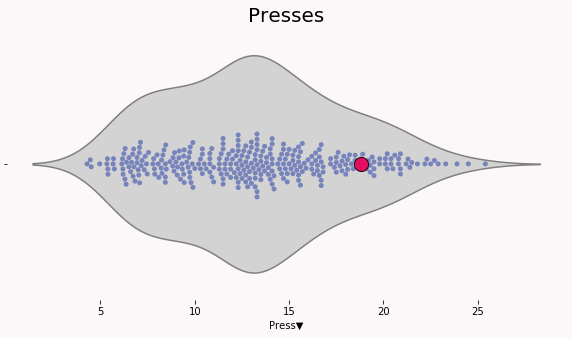

In [19]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)


ax = sns.violinplot(x="Press▼", data=df2, color = 'lightgrey', inner=None)
sns.swarmplot(x = 'Press▼' , color = '#6070b5', data = df2, zorder = 1, alpha = 0.8)

plt.scatter(x=18.80, y=0, c='#ec0054', edgecolor='black', s=200, zorder=2, alpha = 0.9)

plt.title('Presses',c='black',fontsize=20)
#plt.savefig('Pressing.png', dpi=600, bbox_inches='tight')

In [20]:
df2 = df2.sort_values(by='Tkl+Int',ascending=False)

Text(0.5, 1.0, 'Tackles + Interceptions ')

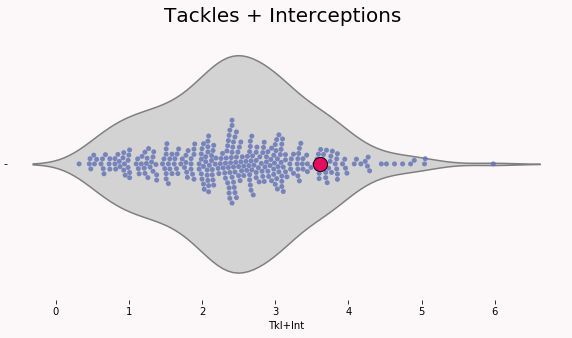

In [21]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)


ax = sns.violinplot(x='Tkl+Int', data=df2, color = 'lightgrey', inner=None)
sns.swarmplot(x = 'Tkl+Int' , color = '#6070b5', data = df2, zorder = 1, alpha = 0.8)

plt.scatter(x=3.61, y=0, c='#ec0054', edgecolor='black', s=200, zorder=2, alpha = 0.9)

plt.title('Tackles + Interceptions ',c='black',fontsize=20)
#plt.savefig('Tackles&Interceptions.png', dpi=600, bbox_inches='tight')

In [22]:
df3 = pd.read_csv(r'/Users/rao/Desktop/Football_Data/Book3.csv')
#df3

In [23]:
df3 = df3[df3['Pos'] != 'GK']
df3 = df3[df3['90s'] >= 7]
df3 = df3.sort_values(by='Targ▼',ascending=False)

Text(0.5, 1.0, 'Target of Passes')

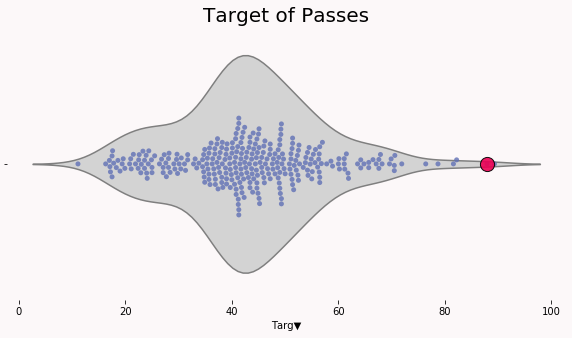

In [25]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

ax = sns.violinplot(x='Targ▼', data=df3, color = 'lightgrey', inner=None)
sns.swarmplot(x = 'Targ▼' , color = '#6070b5', data = df3, zorder = 1, alpha = 0.8)

plt.scatter(x=87.9, y=0, c='#ec0054', edgecolor='black', s=200,zorder=2, alpha = 0.9)

plt.title('Target of Passes',c='black',fontsize=20)
#plt.savefig('Passes received.png', dpi=600, bbox_inches='tight')

In [26]:
df4 = df.copy()
df4 = df4[df4['Pos'] != 'Gk']
df4['1/3rd'] = df4['1/3rd']/df4['90s']
df4 = df4[df4['90s'] >= 7]
df4 = df4.sort_values(by ='1/3rd', ascending = False)
df4

,Player,Nation,Pos,Squad,Age,Born,90s,Total_Cmp,Total_Att,Total_Cmp%,TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Med_Cmp,Med_Att,Med_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xA,A-xA,KP,1/3rd,PPA,CrsPA,Prog
264,Toni Kroos\Toni-Kroos,de GER,MF,Real Madrid,31-081,1990,21.4,1793.0,2004.0,89.5,38275.0,11089.0,716.0,750.0,95.5,656.0,697.0,94.1,394.0,512.0,77.0,8,6.2,1.8,62.0,11.682243,31.0,3.0,179.0
68,Sergio Busquets\Sergio-Busquets,es ESP,MF,Barcelona,32-253,1988,19.4,1742.0,1909.0,91.3,30985.0,8099.0,770.0,819.0,94.0,751.0,803.0,93.5,179.0,226.0,79.2,3,2.7,0.3,25.0,10.000000,21.0,0.0,140.0
398,Daniel Parejo\Daniel-Parejo,es ESP,MF,Villarreal,31-344,1989,25.8,1845.0,2079.0,88.7,36774.0,11174.0,762.0,822.0,92.7,756.0,808.0,93.6,312.0,405.0,77.0,2,4.3,-2.3,32.0,8.449612,32.0,3.0,204.0
329,Lionel Messi\Lionel-Messi,ar ARG,FWMF,Barcelona,33-275,1987,24.6,1504.0,1829.0,82.2,24043.0,7795.0,854.0,950.0,89.9,493.0,578.0,85.3,123.0,220.0,55.9,8,8.6,-0.6,59.0,8.130081,111.0,8.0,238.0
512,Óliver Torres\Oliver-Torres,es ESP,MFFW,Sevilla,26-136,1994,13.5,761.0,897.0,84.8,16358.0,3733.0,319.0,344.0,92.7,257.0,293.0,87.7,169.0,231.0,73.2,2,1.6,0.4,25.0,7.481481,26.0,7.0,76.0
438,Sergio Ramos\Sergio-Ramos,es ESP,DF,Real Madrid,34-361,1986,14.2,1023.0,1114.0,91.8,23732.0,7702.0,279.0,299.0,93.3,489.0,513.0,95.3,250.0,285.0,87.7,0,0.2,-0.2,4.0,7.464789,2.0,1.0,61.0
341,Luka Modrić\Luka-Modric,hr CRO,MF,Real Madrid,35-198,1985,23.1,1483.0,1707.0,86.9,27731.0,7253.0,707.0,775.0,91.2,530.0,597.0,88.8,224.0,285.0,78.6,3,3.3,-0.3,36.0,7.316017,49.0,7.0,168.0
304,Marcelo\Marcelo,br BRA,DF,Real Madrid,32-318,1988,7.0,430.0,525.0,81.9,7118.0,2360.0,234.0,256.0,91.4,148.0,170.0,87.1,39.0,76.0,51.3,2,0.6,1.4,8.0,7.142857,13.0,5.0,45.0
277,Clément Lenglet\Clement-Lenglet,fr FRA,DF,Barcelona,25-282,1995,20.1,1515.0,1634.0,92.7,29298.0,10292.0,575.0,598.0,96.2,733.0,763.0,96.1,193.0,248.0,77.8,0,0.7,-0.7,4.0,6.865672,11.0,2.0,101.0
235,Frenkie de Jong\Frenkie-de-Jong,nl NED,MFDF,Barcelona,23-318,1997,26.2,1981.0,2157.0,91.8,33882.0,9508.0,910.0,978.0,93.0,874.0,924.0,94.6,155.0,184.0,84.2,4,3.2,0.8,29.0,6.793893,24.0,0.0,145.0


Text(0.5, 1.0, 'Final 3rd Passes')

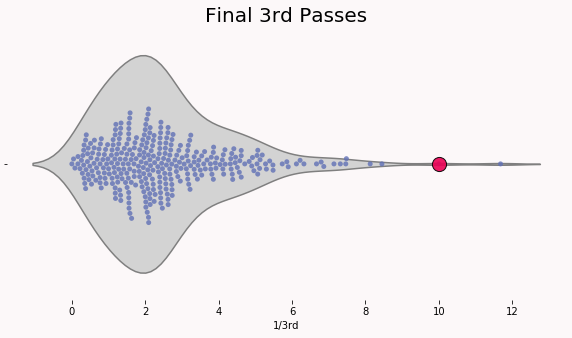

In [27]:
background = '#fcf8f9'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

#ax.grid(ls='dotted',lw=.5,color='linen',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

ax = sns.violinplot(x='1/3rd', data=df4, color = 'lightgrey', inner=None)
sns.swarmplot(x = '1/3rd' , color = '#6070b5', data = df4, zorder = 1, alpha = 0.8)

plt.scatter(x= 10.000000, y=0, c='#ec0054', edgecolor='black', s=200,zorder=2, alpha = 0.9)

plt.title('Final 3rd Passes',c='black',fontsize=20)
#plt.savefig('Final 3rd Passes.png', dpi=600, bbox_inches='tight')